In [31]:
import shutil
import os
import pandas as pd
from imgann import Sample

## Download

Firstly, authenticate in [kaggle](https://www.kaggle.com/datasets/aalborguniversity/brackish-dataset?resource=download) and download the dataset.

In [7]:
def unzip(zipfile, output_path):
  os.makedirs(folder, exist_ok=True)
  os.system(f'unzip {zipfile} -d {output_path}')
  os.system(f'rm {zipfile}')

folder = '../downloads'
zipfile = 'archive.zip'
dataset_name = 'brackish_dataset'
local_path = f'{folder}/{dataset_name}'
unzip(f'{folder}/{zipfile}', local_path)

### Extract frames

In [ ]:
import os
import subprocess
import pathlib
import ipdb

image_types = ['.png', '.jpg', '.jpeg']
video_types = ['.avi', '.mp4']

def extractFrames(args):
    main_dir = args["inputFolder"]
    output_dir = args["outputFolder"]

    for sub_dir, dirs, files in os.walk(main_dir):
        for filename in files:
            if os.path.splitext(filename)[1].lower() in video_types:
                videoFile = os.path.join(os.path.abspath(sub_dir), filename)

                if output_dir != '':
                    fileFolder = output_dir
                else:
                    fileFolder = os.path.splitext(videoFile)[0]
                pathlib.Path(os.path.abspath(fileFolder)).mkdir(exist_ok=True, parents=True)

                fileprefix = os.path.join(fileFolder, os.path.splitext(filename)[0])

                cmd_command = ["ffmpeg", "-i", videoFile, "-vf", "scale=960:540", "-sws_flags", "bicubic", "{}-%04d.png".format(fileprefix), "-hide_banner"]
                subprocess.call(cmd_command)

                # Create a .txt file with the names of all the image files in the respective folder
                dirContent = os.listdir(fileFolder)
                for fi in dirContent:
                    if os.path.splitext(fi)[1] in image_types:
                        with open("{}".format(os.path.join(fileFolder, "inputList.txt")), "a") as f:
                            f.write("{}\n".format(fi))

base_dir = os.path.join(local_path, 'dataset')
input_folder = os.path.join(base_dir, 'videos')
output_folder = os.path.join(base_dir, 'frames')
os.makedirs(output_folder, exist_ok=True)

for subfolder in os.listdir(input_folder):
    os.makedirs(os.path.join(output_folder, subfolder), exist_ok=True)
    extractFrames({"inputFolder": os.path.join(input_folder, subfolder), "outputFolder": os.path.join(output_folder, subfolder)})

## Visualise
To visualise we need to extract the frames from the video, therefore, pick only one video to analyse


In [33]:
# concat annotations
annotation_path = os.path.join(local_path, 'annotations', 'annotations_AAU')
df = pd.concat([pd.read_csv(os.path.join(annotation_path, f)) for f in os.listdir(annotation_path) if f.endswith('.csv')], ignore_index=True)
columns = df.columns[0].split(';')

df_split = df[df.columns[0]].str.split(';', expand=True)
df_split.columns = columns
df_split.head()
df_split.rename(columns={
  'Filename': 'filename',
  'Annotation tag': 'class',
  'Upper left corner X': 'xmin',
  'Upper left corner Y': 'ymin',
  'Lower right corner X': 'xmax',
  'Lower right corner Y': 'ymax'
  }, inplace=True)

df_split.head()

# add dummy width and height for visualisation library
df_split['width'] = 0
df_split['height'] = 0

new_annotation_path = os.path.join(local_path, 'annotations', 'annotations.csv')
df_split.to_csv(new_annotation_path, index=False)

In [37]:
# copy all images to a single folder
images_folder = os.path.join(base_dir, 'all_images')
os.makedirs(images_folder, exist_ok=True)

for subfolder in os.listdir(output_folder):
    for f in os.listdir(os.path.join(output_folder, subfolder)):
        if f.endswith('.png'):
          shutil.copy(os.path.join(output_folder, subfolder, f), os.path.join(images_folder, f))




INFO:imgann.sample:
                            IMAGE ANNOTATION SUMMARY                            
number of images         : 12444
folder image counts      :
                         > all_images : 12444
number of image sizes    : 1
image_size               : 0 X 0
number of object classes : 6
object classes           : starfish | crab | small_fish | fish | shrimp | jellyfish
number of objects        : 35565
class object count       :
                         > starfish   : 7912
                         > crab       : 12348
                         > small_fish : 10768
                         > fish       : 3352
                         > shrimp     : 548
                         > jellyfish  : 637



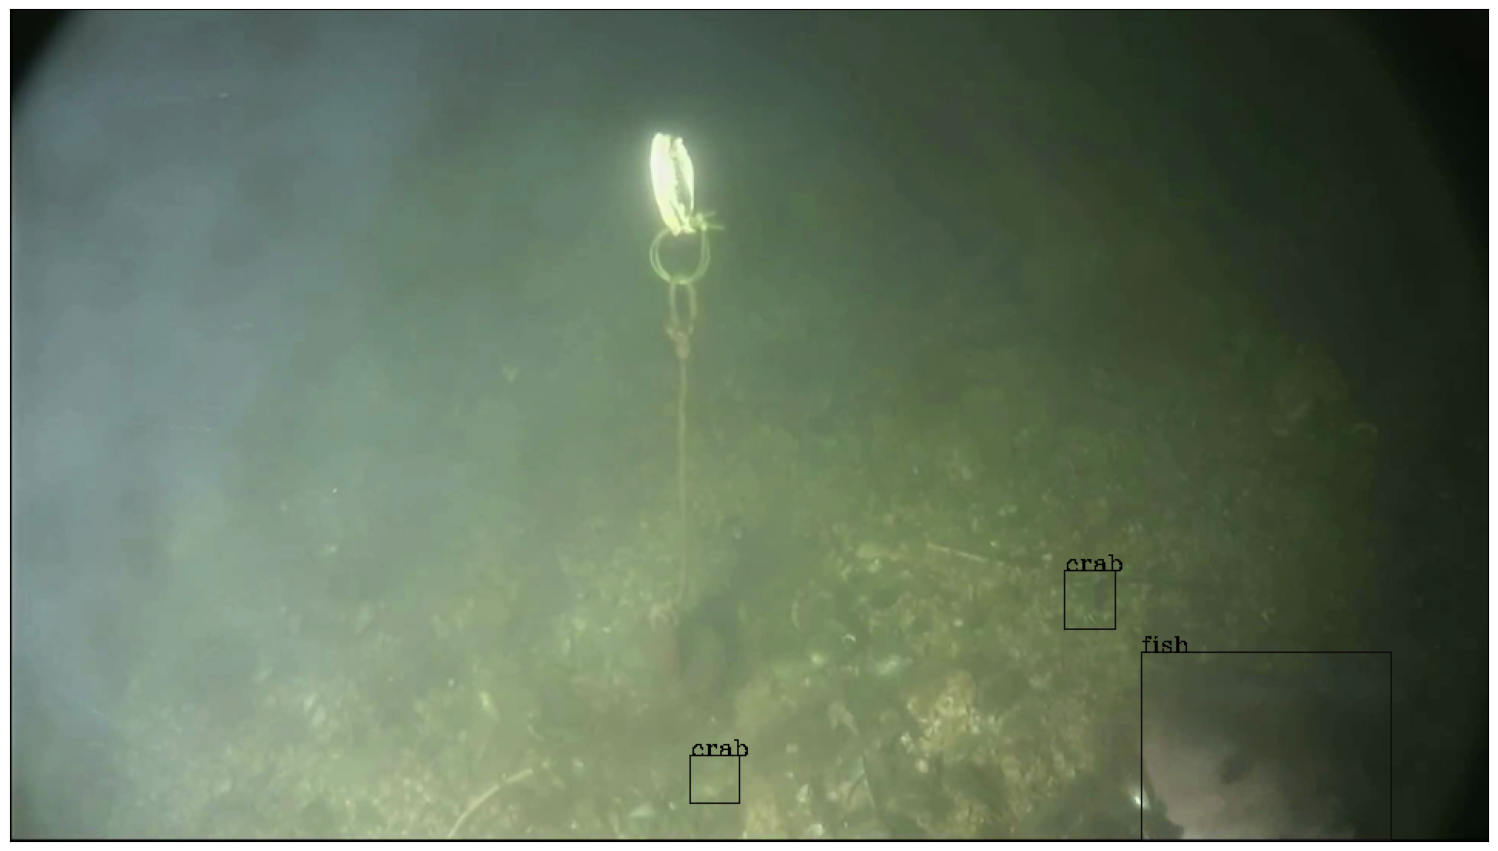

In [38]:
format = 'csv'

Sample.describe_ann(
  data_path = images_folder,
  ann_path = new_annotation_path,
  ann_type = format
)

Sample.show_samples(
  data_path = images_folder,
  ann_path = new_annotation_path,
  ann_type = format,
  num_of_samples = 1,
  image_shape=[1920, 1080]
)